In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf() # For saving better figures
import numpy as np
import scipy

In [3]:
df = pd.read_csv('export_data.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_path = "../../Dictionary Mapping/counts_and_subject.csv"
df_scores = pd.read_csv('../../../models_storage/word_embeddings_data/text_with_cosine_scores_wdg_2020_sept10.csv')
df = pd.read_csv(data_path)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df['edited_filename'] = df['article_id'].apply(lambda x: x[16:])
df.head()

,article_id,culture_ngram_count,culture_ngram_count.1,relational_ngram_count,relational_ngram_count.1,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,relational_author_count,primary_subject,year,journal_title,journal_id,edited_filename
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,0,Sociology,1978,Contemporary Sociology,j100496,10.2307_2065002
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,0,Management & Organizational Behavior,1986,Public Productivity & Management Review,j100852,10.2307_3380821
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,0,Sociology,1983,American Sociological Review,j100080,10.2307_2095822
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,0,Management & Organizational Behavior,1985,Management Science,j100269,10.2307_2631839
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,0,Management & Organizational Behavior,2005,MIR: Management International Review,j50000481,10.2307_40836133


In [6]:
df = pd.merge(df, df_scores, how='left', on='edited_filename')
df.head()

,article_id,culture_ngram_count,culture_ngram_count.1,relational_ngram_count,relational_ngram_count.1,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,...,journal_title,journal_id,edited_filename,Unnamed: 0,Unnamed: 0.1,filename,text,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,...,Contemporary Sociology,j100496,10.2307_2065002,48041.0,48041.0,../../../jstor_data/ocr/journal-article-10.230...,symposium toward more cumulative inquiry phili...,0.483893,0.463146,0.613386
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,...,Public Productivity & Management Review,j100852,10.2307_3380821,57494.0,57494.0,../../../jstor_data/ocr/journal-article-10.230...,productivity review analysis incentive sick le...,0.500650,0.470630,0.517173
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,...,American Sociological Review,j100080,10.2307_2095822,14692.0,14692.0,../../../jstor_data/ocr/journal-article-10.230...,local friendship ties community attachment mas...,0.564931,0.531212,0.586242
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,...,Management Science,j100269,10.2307_2631839,67738.0,67738.0,../../../jstor_data/ocr/journal-article-10.230...,management science vol december printed notes ...,0.544285,0.526946,0.478299
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,...,MIR: Management International Review,j50000481,10.2307_40836133,39044.0,39044.0,../../../jstor_data/ocr/journal-article-10.230...,mir special issue pp mir management internatio...,0.737297,0.562613,0.592721


In [7]:
df['culture_ratio'] = df['culture_ngram_count']/df['word_count']
df['demographic_ratio'] = df['demographic_ngram_count']/df['word_count']
df['relational_ratio'] = df['relational_ngram_count']/df['word_count']

df['culture_word2vec'] = df['culture_word2vec_cosine'] #/df['word_count']
df['demographic_word2vec'] = df['demographic_word2vec_cosine'] #/df['word_count']
df['relational_word2vec'] = df['relational_word2vec_cosine'] #/df['word_count']

In [8]:
#normalization
df['culture_ratio'] = (df['culture_ratio'] - df['culture_ratio'].min())/(df['culture_ratio'].max() - df['culture_ratio'].min())
df['demographic_ratio'] = (df['demographic_ratio'] - df['demographic_ratio'].min())/(df['demographic_ratio'].max() - df['demographic_ratio'].min())
df['relational_ratio'] = (df['relational_ratio'] - df['relational_ratio'].min())/(df['relational_ratio'].max() - df['relational_ratio'].min())


In [9]:
def year_change(x):
    try:
        return(int(x))
    except:
        return(int(x[:4]))

In [10]:
df['year_transform'] = df.year.apply(lambda x: year_change(x))

In [11]:
df_avg = df.groupby(by=['year_transform']).mean()

In [12]:
df_avg = df_avg.reset_index()

In [13]:
df_avg.head()

,year_transform,culture_ngram_count,culture_ngram_count.1,relational_ngram_count,relational_ngram_count.1,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,...,Unnamed: 0.1,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine,culture_ratio,demographic_ratio,relational_ratio,culture_word2vec,demographic_word2vec,relational_word2vec
0,1971,17.373167,9.541789,37.541056,18.817449,13.721408,8.365103,4558.380499,0.016129,0.020528,...,34370.459677,0.501405,0.476667,0.556069,0.034550,0.038342,0.075253,0.556069,0.476667,0.501405
1,1972,16.714052,8.830882,36.923203,17.585784,13.424020,7.810458,4479.852124,0.004085,0.011438,...,34656.646242,0.501702,0.474467,0.562514,0.033121,0.037297,0.079830,0.562514,0.474467,0.501702
2,1973,21.266574,11.938590,43.034892,20.392882,15.679693,8.789253,4731.087927,0.019539,0.025122,...,34680.096301,0.505929,0.475456,0.567901,0.038663,0.041847,0.084831,0.567901,0.475456,0.505929
3,1974,18.333075,9.244565,41.133540,19.472050,15.875000,9.268634,4783.451087,0.010870,0.012422,...,34310.981366,0.505020,0.475443,0.562716,0.034455,0.042974,0.082473,0.562716,0.475443,0.505020
4,1975,19.758838,10.195076,51.916035,23.698232,17.356061,9.953914,5119.929293,0.039141,0.044823,...,34617.116162,0.518460,0.483487,0.564421,0.032789,0.043799,0.093006,0.564421,0.483487,0.518460


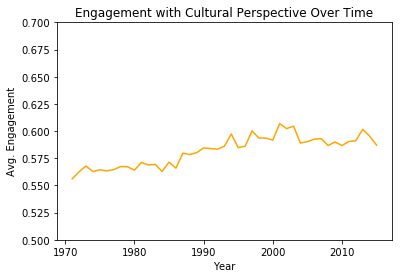

In [14]:
ax = sns.lineplot(x="year_transform", y="culture_word2vec_cosine", data=df_avg, color = 'orange')
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.5, 0.7))
ax.set_title('Engagement with Cultural Perspective Over Time')
plt.show()

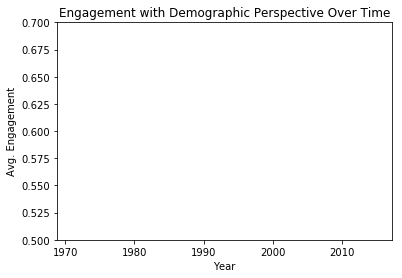

In [15]:
ax = sns.lineplot(x="year_transform", y="demographic_word2vec_cosine", data=df_avg, color = 'green')
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.5, 0.7))
ax.set_title('Engagement with Demographic Perspective Over Time')
plt.show()

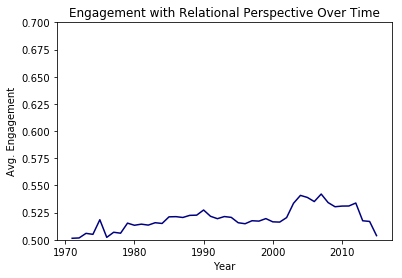

In [16]:
ax = sns.lineplot(x="year_transform", y="relational_word2vec_cosine", data=df_avg, color = 'navy')
ax.set(xlabel='Year', ylabel='Engagement')
ax.set(ylim=(0.5, 0.7))
ax.set_title('Engagement with Relational Perspective Over Time')
plt.show()

In [17]:
df_new = df[df['culture_word2vec_cosine'].isnull() == False]

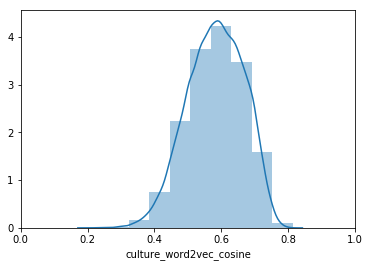

In [18]:
ax = sns.distplot(df_new["culture_word2vec_cosine"], bins = 10)
# ax.set(xlabel='Year', ylabel='Engagement')
ax.set(xlim=(0, 1))
# ax.set_title('Engagement with Cultural Perspective Over Time')
plt.show()

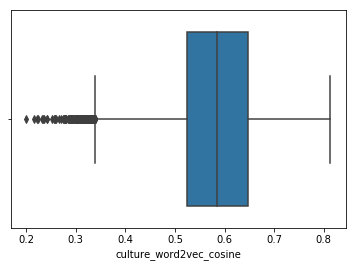

In [19]:
ax = sns.boxplot(x = df_new["culture_word2vec_cosine"])
# ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(xlim=(0, 1))
# ax.set_title('Engagement with Cultural Perspective Over Time')
plt.show()

In [20]:
print("Skew of Distribution") 
print(df_new["culture_word2vec_cosine"].skew())

Skew of Distribution
-0.26019933968207354


In [21]:
df_avg_sociology = df[df['primary_subject'] == 'Sociology'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_sociology = df_avg_sociology.reset_index()

In [22]:
df_avg_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'year_transform']].groupby(by=['year_transform']).quantile(0.5)
df_avg_management = df_avg_management.reset_index()

In [23]:
df_avg_sociology = df_avg_sociology[['relational_word2vec','culture_word2vec','demographic_word2vec',
                                                           'culture_ratio', 'demographic_ratio',
                                                           'relational_ratio','year_transform']]
df_avg_sociology['percentile'] = '50th'

df_avg_management = df_avg_management[['relational_word2vec','culture_word2vec','demographic_word2vec',
                                                           'culture_ratio', 'demographic_ratio',
                                                           'relational_ratio','year_transform']]
df_avg_management['percentile'] = '50th'

In [24]:
df_25_sociology = df[df['primary_subject'] == 'Sociology'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'year_transform']].groupby(
    by=['year_transform']).quantile(0.25)
df_25_sociology = df_25_sociology.reset_index()

df_75_sociology = df[df['primary_subject'] == 'Sociology'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_sociology = df_75_sociology.reset_index()



df_25_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                        'year_transform']].groupby(by=['year_transform']).quantile(0.25)
df_25_management = df_25_management.reset_index()

df_75_management = df[df['primary_subject'] == 'Management & Organizational Behavior'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                        'year_transform']].groupby(by=['year_transform']).quantile(0.75)
df_75_management = df_75_management.reset_index()

In [25]:
df_25_sociology['percentile'] = '25th'
df_25_management['percentile'] = '25th'

df_75_sociology['percentile'] = '75th'
df_75_management['percentile'] = '75th'

In [26]:
df_sociology = pd.concat([df_25_sociology, df_avg_sociology, df_75_sociology])
df_management = pd.concat([df_25_management, df_avg_management, df_75_management])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


# Raw ratio

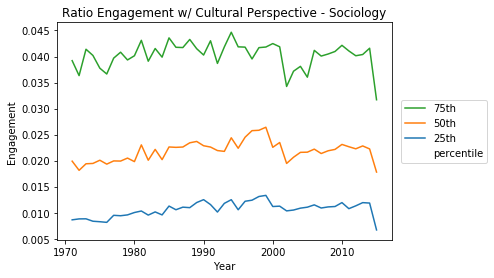

In [90]:
ax = sns.lineplot(x="year_transform", y="culture_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Cultural Perspective - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_cultural_sociology_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

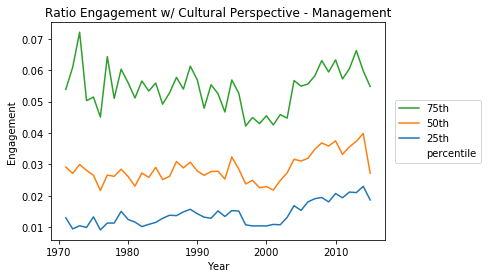

In [91]:
ax = sns.lineplot(x="year_transform", y="culture_ratio", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Cultural Perspective - Management')
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_cultural_mgmt_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

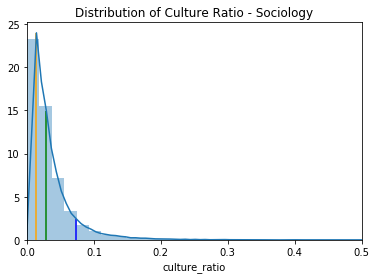

Skew of Distribution
3.9429023946970725


In [92]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["culture_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Engagement')
ax.set(xlim=(0, 0.5))

ax.set_title('Distribution of Culture Ratio - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["culture_ratio"].skew())

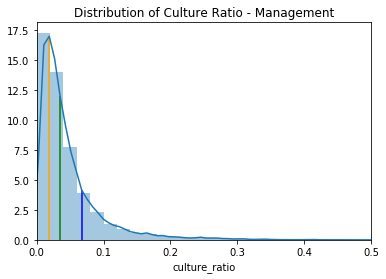

Skew of Distribution
3.3484821604648936


In [93]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["culture_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Culture Ratio - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["culture_ratio"].skew())

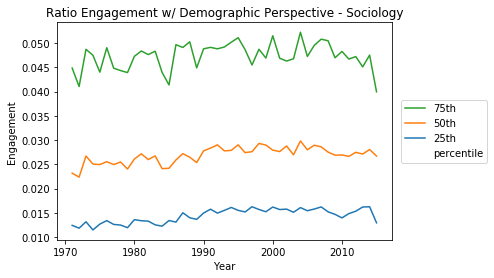

In [94]:
ax = sns.lineplot(x="year_transform", y="demographic_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Demographic Perspective - Sociology')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_demographic_sociology_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

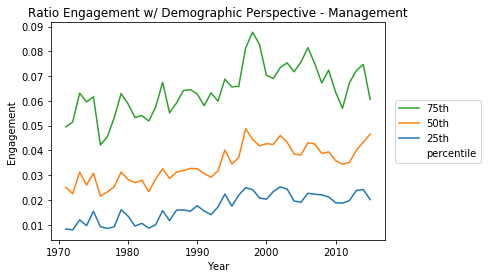

In [95]:
ax = sns.lineplot(x="year_transform", y="demographic_ratio", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Demographic Perspective - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_demographic_mgmt_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

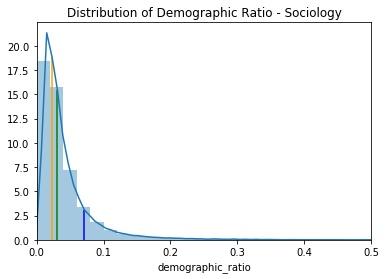

Skew of Distribution
4.986486060249517


In [96]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["demographic_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Demographic Ratio - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["demographic_ratio"].skew())

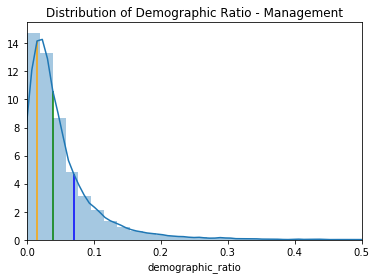

Skew of Distribution
3.711820015001856


In [97]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["demographic_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Demographic Ratio - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["demographic_ratio"].skew())

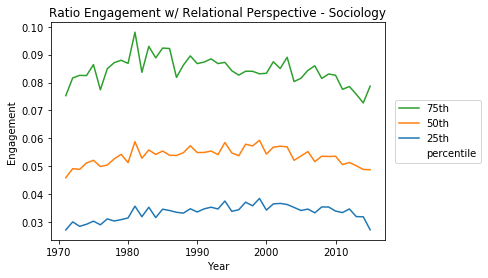

In [98]:
ax = sns.lineplot(x="year_transform", y="relational_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Relational Perspective - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_relational_sociology_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

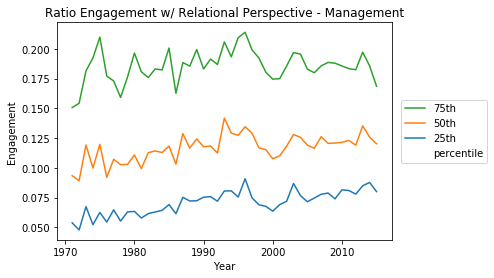

In [99]:
ax = sns.lineplot(x="year_transform", y="relational_ratio", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Relational Perspective - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_relational_mgmt_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

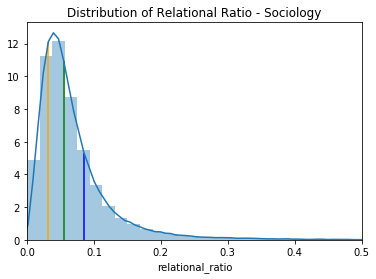

Skew of Distribution
3.7554180250430806


In [100]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["relational_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Relational Ratio - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["relational_ratio"].skew())

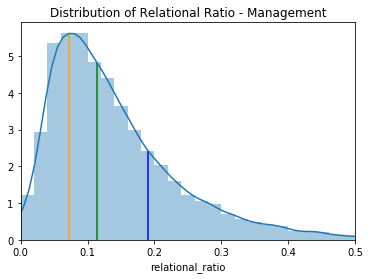

Skew of Distribution
1.745815618031985


In [101]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["relational_ratio"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 0.5))
ax.set_title('Distribution of Relational Ratio - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["relational_ratio"].skew())

# Cosine 

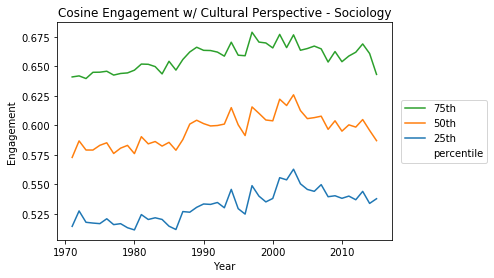

In [102]:
ax = sns.lineplot(x="year_transform", y="culture_word2vec", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Cultural Perspective - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_cultural_sociology_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

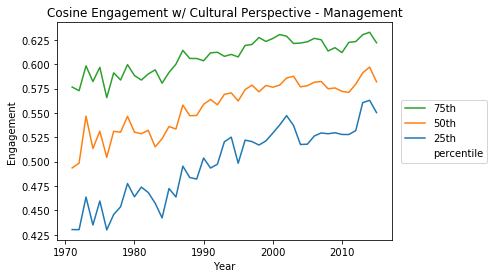

In [103]:
ax = sns.lineplot(x="year_transform", y="culture_word2vec", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Cultural Perspective - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_cultural_mgmt_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


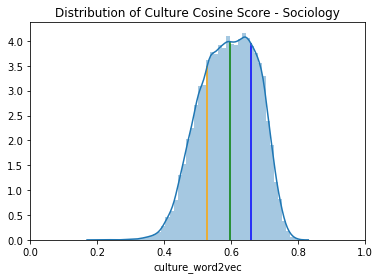

Skew of Distribution
-0.2299889027037676


In [104]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["culture_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Culture Cosine Score - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["culture_word2vec"].skew())

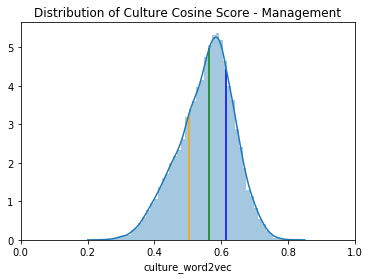

Skew of Distribution
-0.38976131498352007


In [105]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["culture_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Culture Cosine Score - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["culture_word2vec"].skew())

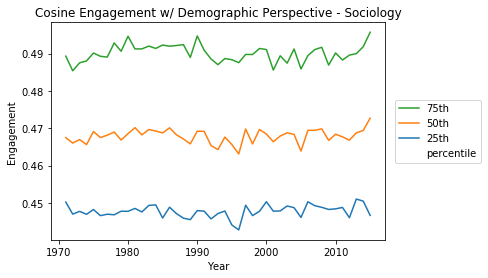

In [106]:
ax = sns.lineplot(x="year_transform", y="demographic_word2vec", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Demographic Perspective - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_demographic_sociology_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

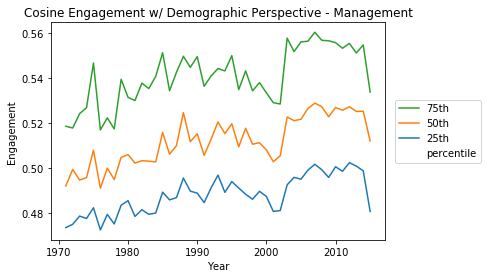

In [107]:
ax = sns.lineplot(x="year_transform", y="demographic_word2vec", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Demographic Perspective - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_demographic_mgmt_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

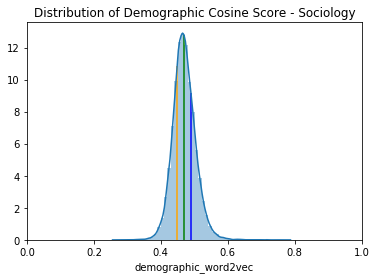

Skew of Distribution
0.4858275387634362


In [108]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["demographic_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Demographic Cosine Score - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["demographic_word2vec"].skew())

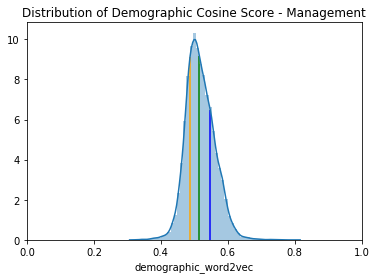

Skew of Distribution
0.3600619798689232


In [109]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["demographic_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Demographic Cosine Score - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["demographic_word2vec"].skew())

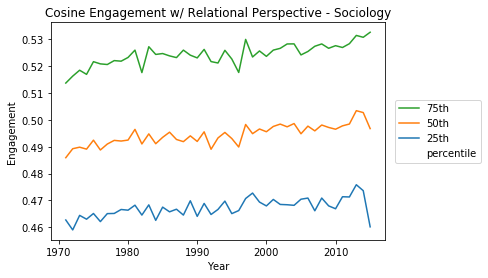

In [110]:
ax = sns.lineplot(x="year_transform", y="relational_word2vec", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Relational Perspective - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_relational_sociology_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

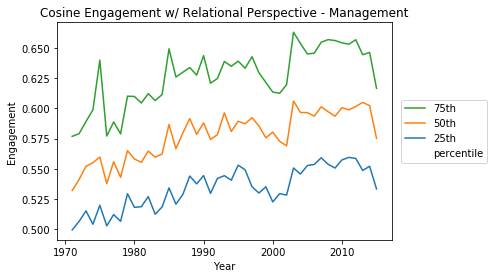

In [111]:
ax = sns.lineplot(x="year_transform", y="relational_word2vec", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Relational Perspective - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_relational_mgmt_unfiltered"
plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

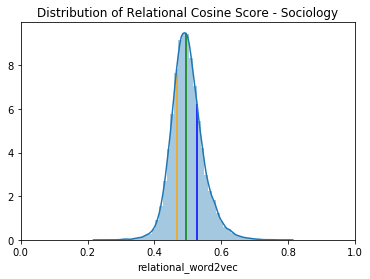

Skew of Distribution
0.47150021688996807


In [112]:
ax = sns.distplot(df[df['primary_subject'] == 'Sociology']["relational_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Relational Cosine Score - Sociology')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Sociology']["relational_word2vec"].skew())

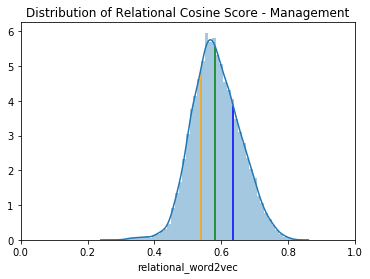

Skew of Distribution
0.08325050773402465


In [113]:
ax = sns.distplot(df[df['primary_subject'] == 'Management & Organizational Behavior']["relational_word2vec"], bins = 50)
# ax.set(xlabel='Year', ylabel='Avg. Engagement')
ax.set(xlim=(0, 1))
ax.set_title('Distribution of Relational Cosine Score - Management')

x,y = ax.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)

nearest_05 = np.abs(cdf-0.5).argmin()
nearest_025 = np.abs(cdf-0.25).argmin()
nearest_075 = np.abs(cdf-0.75).argmin()


x_median = x[nearest_05]
y_median = y[nearest_05]

x_025 = x[nearest_025]
y_025 = y[nearest_025]

x_075 = x[nearest_075]
y_075 = y[nearest_075]

plt.vlines(x_median, 0, y_median, color = 'green')
plt.vlines(x_025, 0, y_025, color = 'orange')
plt.vlines(x_075, 0, y_075, color = 'blue')

plt.show()
print("Skew of Distribution") 
print(df[df['primary_subject'] == 'Management & Organizational Behavior']["relational_word2vec"].skew())